# Задание 5.3

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandahouse
from scipy import stats

In [26]:
data = Getch(''' SELECT user_id, exp_group
                ,countIf(action, action='like') as likes
                ,countIf(action, action='view') as views
                ,countIf(action, action='like') / countIf(action, action='view') as ctr
                FROM simulator_20230820.feed_actions
                WHERE time >=  toUnixTimestamp('2023-07-30')
                AND time <= toUnixTimestamp('2023-08-05')
                AND (exp_group = 0 or exp_group = 1 or exp_group = 2 or exp_group = 3)
                GROUP BY user_id, exp_group
                Order by user_id''').df

# СРАВНЕНИЕ ГРУПП 0 и 3

In [10]:
# t-тест

In [27]:
stats.ttest_ind(data[data.exp_group == 0].ctr,
                data[data.exp_group == 3].ctr,
                equal_var=False)

Ttest_indResult(statistic=-15.37656513955401, pvalue=4.9886143333114755e-53)

Метод линеаризованных лайков:

In [28]:
ctr_control_1 = data[data.exp_group == 0].likes.sum() / data[data.exp_group == 0].views.sum()
data['linearized_likes_1'] = data.likes - ctr_control_1 * data.views
stats.ttest_ind(data[data.exp_group == 0].linearized_likes_1,
                data[data.exp_group == 3].linearized_likes_1,
                equal_var=False)

Ttest_indResult(statistic=-17.85270664229171, pvalue=1.0721168485295004e-70)

Снизили p-value, отличие большое, т.к. статистика -15.4 против статистики -17.9. Метод более чувствителен, чем простой т-тест

# СРАВНЕНИЕ ГРУПП 1 и 2

In [29]:
stats.ttest_ind(data[data.exp_group == 1].ctr,
                data[data.exp_group == 2].ctr,
                equal_var=False)

Ttest_indResult(statistic=0.536209812127344, pvalue=0.5918218427419375)

Метод линеаризованных лайков:

In [30]:
ctr_control_2 = data[data.exp_group == 1].likes.sum() / data[data.exp_group == 2].views.sum()
data['linearized_likes_2'] = data.likes - ctr_control_2 * data.views
stats.ttest_ind(data[data.exp_group == 1].linearized_likes_2,
                data[data.exp_group == 2].linearized_likes_2,
                equal_var=False)

Ttest_indResult(statistic=6.624873980874924, pvalue=3.6110764190414476e-11)

При сравнении групп 1 и 2 видно, что метод линеаризованных  лайков показал себя лучше: там, где t-test различия не выявил, метод линеаризованных  лайков выявил различия на очень высоком уровне значимости. 

<AxesSubplot:xlabel='linearized_likes_2', ylabel='Count'>

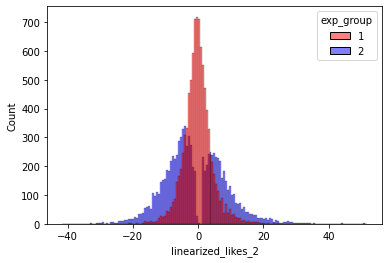

In [31]:
sns.histplot(data = data.query('exp_group == 1 | exp_group == 2'), 
              x='linearized_likes_2', 
              hue='exp_group', 
              palette = ['r', 'b'],
              alpha=0.5,
              kde=False)

Общий вывод: в данном конкретном примере метод линеаризованных лайков улучшил работу t-теста